In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [5]:
df = pd.read_csv("../data/raw/raw-data.csv", low_memory=False)
print(df.columns)
print(df.head())

Index(['restoId', 'restoName', 'tags', 'address', 'scoreTotal', 'avgPrice',
       'numReviews', 'scoreFood', 'scoreService', 'scoreDecor', 'review_id',
       'numreviews2', 'valueForPriceScore', 'noiseLevelScore',
       'waitingTimeScore', 'reviewerId', 'reviewerFame', 'reviewerNumReviews',
       'reviewDate', 'reviewScoreOverall', 'reviewScoreFood',
       'reviewScoreService', 'reviewScoreAmbiance', 'reviewText'],
      dtype='object')
   restoId     restoName                                               tags  \
0   255757  India Palace  Indiaas|zakenlunch|Live muziek|Met familie|Met...   
1   255757  India Palace  Indiaas|zakenlunch|Live muziek|Met familie|Met...   
2   255757  India Palace  Indiaas|zakenlunch|Live muziek|Met familie|Met...   
3   255757  India Palace  Indiaas|zakenlunch|Live muziek|Met familie|Met...   
4   255757  India Palace  Indiaas|zakenlunch|Live muziek|Met familie|Met...   

                                            address scoreTotal avgPrice  \
0  N


Unieke afgeronde ratings: [np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0), np.float64(5.5), np.float64(6.0), np.float64(6.5), np.float64(7.0), np.float64(7.5), np.float64(8.0), np.float64(8.5), np.float64(9.0), np.float64(9.5), np.float64(10.0)]


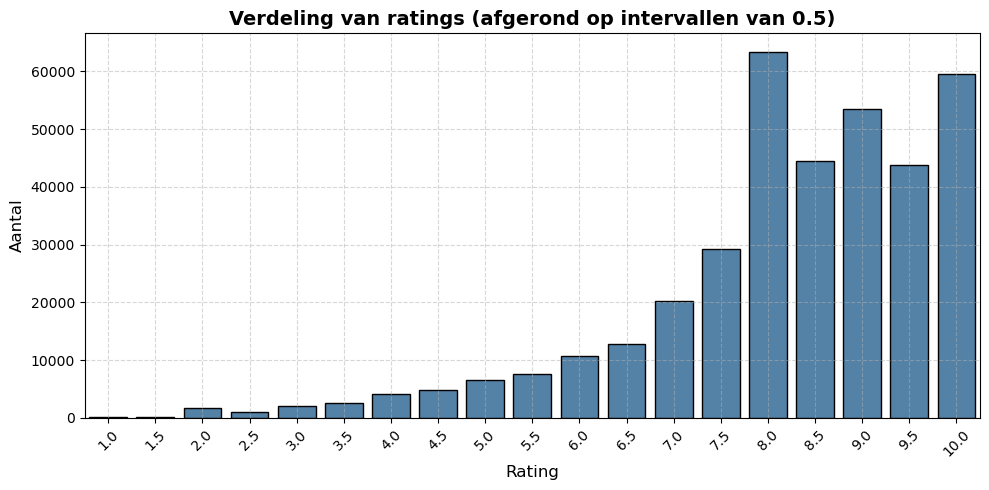

In [6]:
df["reviewScoreOverall"] = pd.to_numeric(df["reviewScoreOverall"], errors="coerce")
df_clean = df.dropna(subset=["reviewScoreOverall"]).copy()

# Afronden op 0.5 stappen
df_clean["ratingRounded"] = (df_clean["reviewScoreOverall"] * 2).round() / 2

print("\nUnieke afgeronde ratings:", sorted(df_clean["ratingRounded"].unique()))

rating_counts = df_clean["ratingRounded"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x=rating_counts.index,
    y=rating_counts.values,
    color="steelblue",
    edgecolor="black"
)
plt.title("Verdeling van ratings (afgerond op intervallen van 0.5)", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Aantal", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Unieke afgeronde ratings: [np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(4.5), np.float64(5.0)]


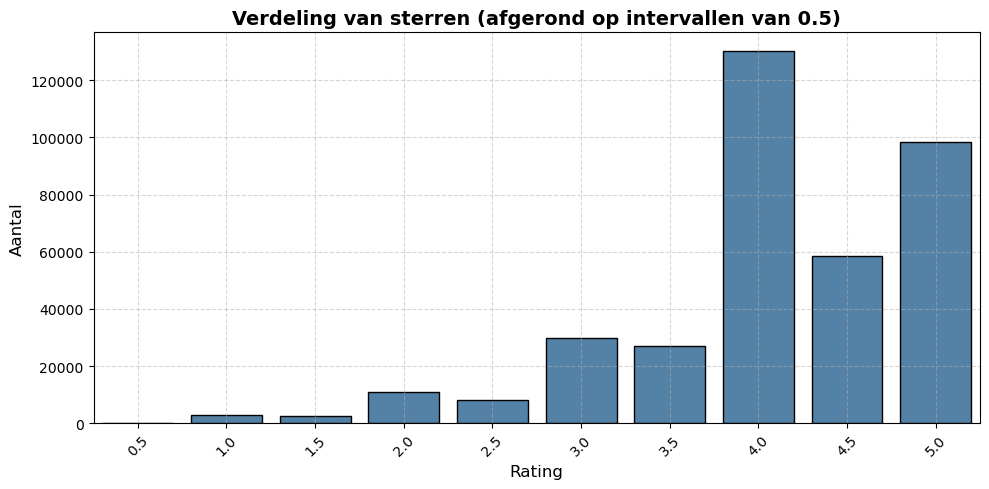

In [7]:
df["reviewScoreOverall"] = pd.to_numeric(df["reviewScoreOverall"], errors="coerce")
df_clean = df.dropna(subset=["reviewScoreOverall"]).copy()

# Afronden op 0.5 stappen en naar sterren
df_clean["ratingRounded"] = (df_clean["reviewScoreOverall"]).round() / 2

print("\nUnieke afgeronde ratings:", sorted(df_clean["ratingRounded"].unique()))

rating_counts = df_clean["ratingRounded"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    x=rating_counts.index,
    y=rating_counts.values,
    color="steelblue",
    edgecolor="black"
)
plt.title("Verdeling van sterren (afgerond op intervallen van 0.5)", fontsize=14, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Aantal", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Overzicht van reviewteksten:
- Geen tekst: 0
- Korte/onzin tekst (≤ 5 tekens): 11958
- Geldige tekst (> 5 tekens): 367760

Voorbeeld schoongemaakte review:
heerlijk eten en leuke sfeer veel keuze bij het buffet en toetjes ook heel goed werd steeds aangevuld en was vers vriendelijk personeel ik kom zeker teruy enige misleidende op de website is dat drinken niet inclusief was het is bericht uit 2016 zijn waar dat wel bij stond maar jaartal werd niet vermeld dus ik en vele anderen dachten dat het nu ook geldt


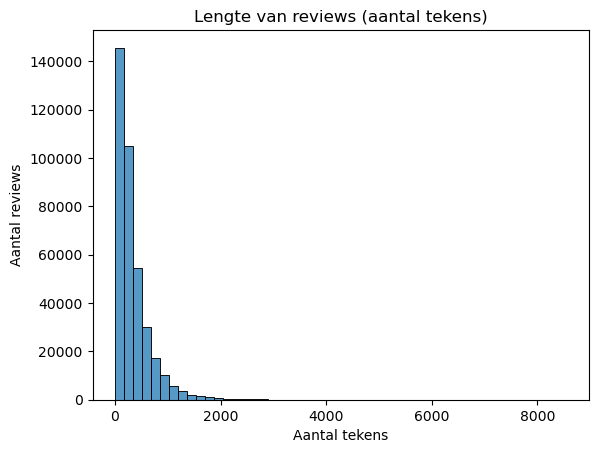

In [8]:
df["reviewText"] = df["reviewText"].astype(str)

geen_tekst = df["reviewText"].isna().sum() + (df["reviewText"].str.strip() == "").sum()
korte_tekst = ((df["reviewText"].str.len() <= 5) & (df["reviewText"].str.len() > 0)).sum()
geldige_tekst = (df["reviewText"].str.len() > 5).sum()

print("Overzicht van reviewteksten:")
print(f"- Geen tekst: {geen_tekst}")
print(f"- Korte/onzin tekst (≤ 5 tekens): {korte_tekst}")
print(f"- Geldige tekst (> 5 tekens): {geldige_tekst}")

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

df["cleaned"] = df["reviewText"].apply(clean_text)

print("\nVoorbeeld schoongemaakte review:")
print(df["cleaned"].iloc[0])

df["text_len"] = df["reviewText"].apply(len)
sns.histplot(df["text_len"], bins=50)
plt.title("Lengte van reviews (aantal tekens)")
plt.xlabel("Aantal tekens")
plt.ylabel("Aantal reviews")
plt.show()